### Importing necessary libraries

In [28]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import statistics
from scipy.stats import pearsonr
from scipy import stats

### Importing the data

In [2]:
# use a personal style sheet
plt.style.use("./styles/mystyle.mplstyle")

# listing all the current data
data_files = glob.glob(r'../Experiment/data/*.csv') # taking only the two complete files

### Concatenating all data into one big dataset

In [3]:
df = pd.DataFrame()
for i in range(len(data_files)):
    temp_df = pd.read_csv(data_files[i])
    df = pd.concat([df, temp_df])

# select only the main task
df = df.loc[df['task']=='experiment']

# extracting sample size
n = len(set(df.pt_num))


###  the effect of SOA, difficulty of occlusion, and size of occlusion.

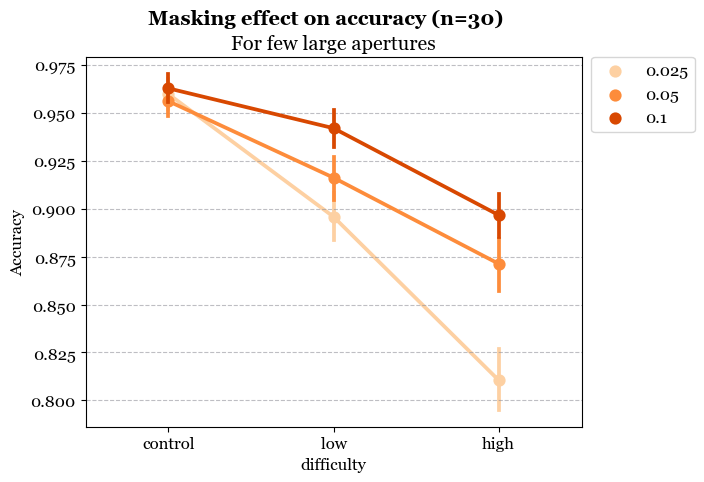

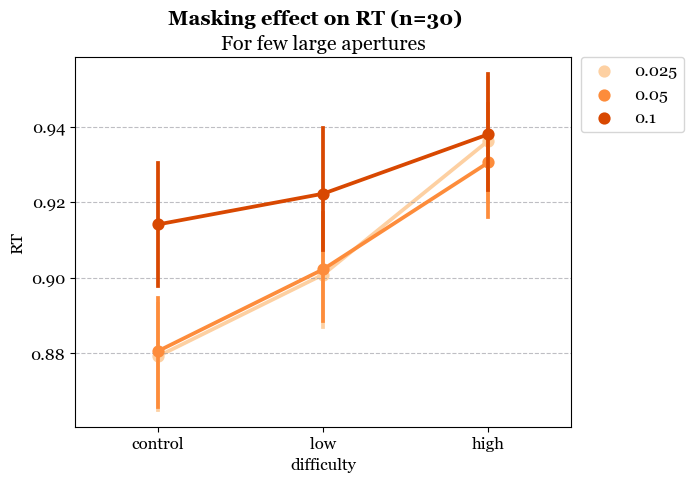

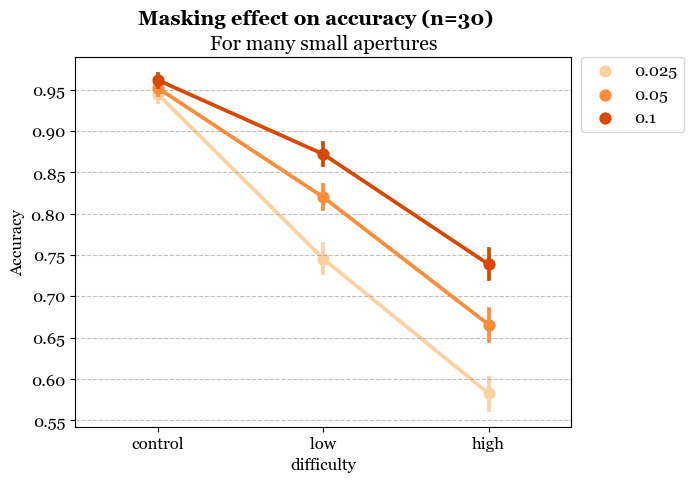

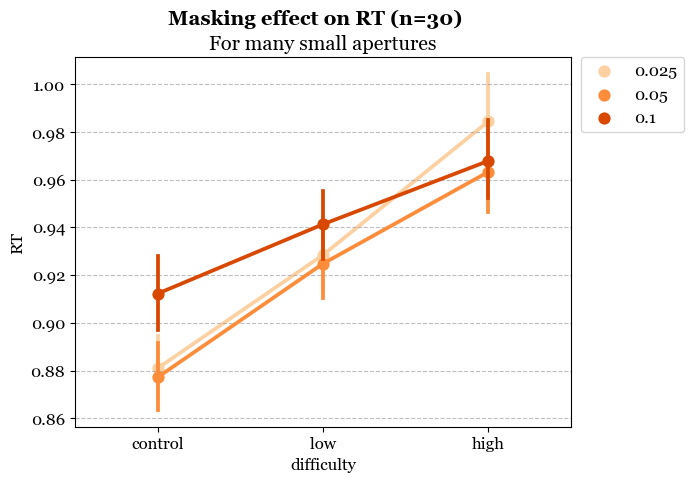

In [4]:
# checking the effect of masking
# for each occluder size separately
for so in set(df['size_occl']):
    # for each measure of performance separately
    for dv in ['acc', 'rt']:
        if dv == 'rt':
            data = df.loc[df['acc']] # only take correct trials for RT
        elif dv == 'acc':
            data = df
        plt.figure()
        plot = sns.pointplot(
            data = data.loc[data['size_occl']==so],
            y = dv,
            x = 'difficulty',
            order = ['control', 'low', 'high'],
            hue = 'soa',
            palette = 'Oranges',
            join = True
        )
        if dv == 'acc':
            # plt.ylim(0.6, 1)
            plt.ylabel("Accuracy")
            plt.suptitle("Masking effect on accuracy (n={})".format(n))
        elif dv == 'rt':
            # plt.ylim(900, 1200)
            plt.ylabel("RT")
            plt.suptitle("Masking effect on RT (n={})".format(n))
        plt.title('For {} apertures'.format(so))
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        plt.show()

### Checking the effect of category on experiment**

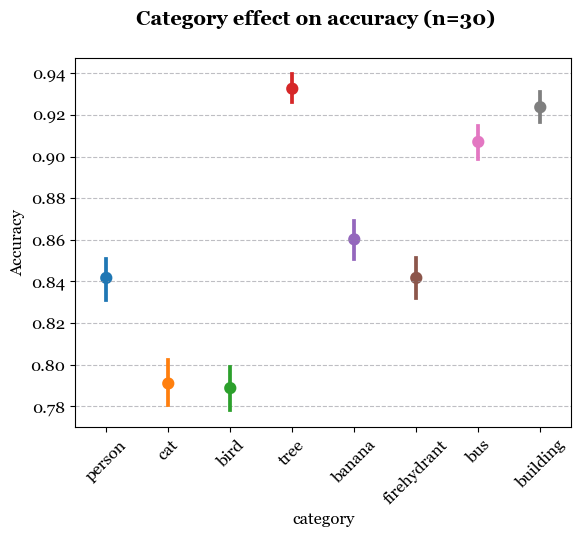

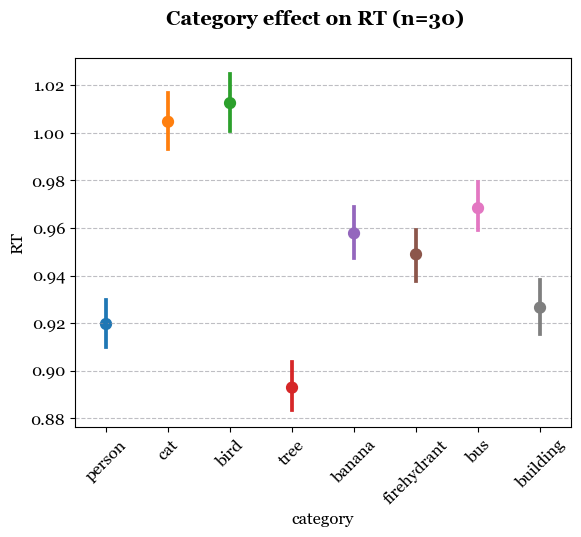

"\nQuestions: \n1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. \nOnly focusing on categories and it's corresponding acc and RT.\n\n2. Is SOA levels important in this plot? I was not sure so left it as a comment.\n\n3. I have arranged the order by hand to be clear looking, is there any easy way to do that?\n\n"

In [5]:
# for each measure of performance separately
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df
    elif dv == 'acc':
        data = df
    plt.figure()
    plot = sns.pointplot(
        data = df,
        y = dv,
        x = 'category',
        order = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
        # hue = 'soa',
        # hue = 'size_occl',
        palette = 'tab10',
        join = False
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Category effect on accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Category effect on RT (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

"""
Questions: 
1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. 
Only focusing on categories and it's corresponding acc and RT.

2. Is SOA levels important in this plot? I was not sure so left it as a comment.

3. I have arranged the order by hand to be clear looking, is there any easy way to do that?

"""

### Checking the effect of keys on experiment

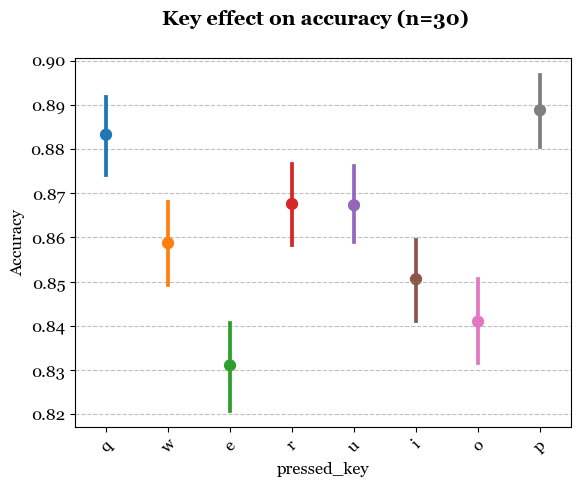

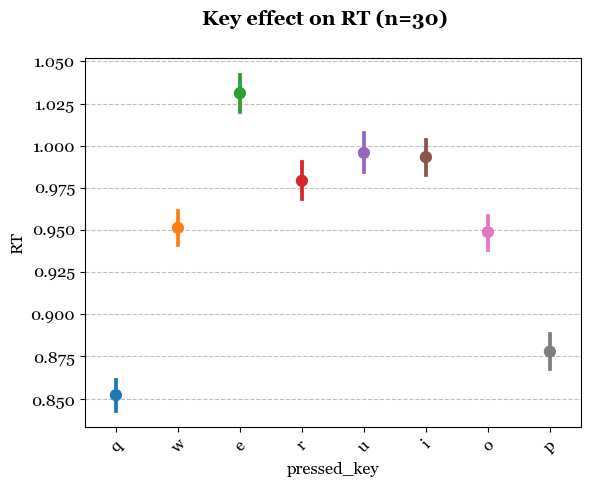

"\nQuestions: \n1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. \nOnly focusing on keys and it's corresponding acc and RT.\n\n2. Is SOA levels important in this plot? I was not sure so left it as a comment.\n\n"

In [6]:
# for each measure of performance separately
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df
    elif dv == 'acc':
        data = df
    plt.figure()
    plot = sns.pointplot(
        data = df,
        y = dv,
        x = 'pressed_key',
        order = ['q','w','e','r','u','i','o','p'],
        #hue = 'soa',
        palette = 'tab10',
        join = False
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Key effect on accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Key effect on RT (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

"""
Questions: 
1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. 
Only focusing on keys and it's corresponding acc and RT.

2. Is SOA levels important in this plot? I was not sure so left it as a comment.

"""

### Checking the effect of block whether participants accuracy and reaction time depends on the block number

C:\Users\veoni\AppData\Local\Temp\ipykernel_23448\2697962484.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.lineplot(


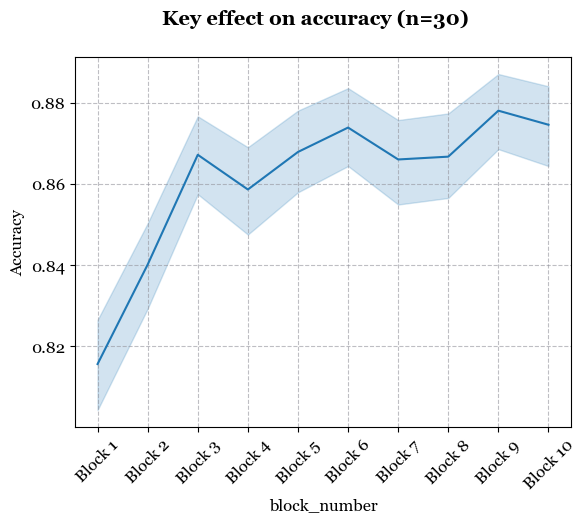

C:\Users\veoni\AppData\Local\Temp\ipykernel_23448\2697962484.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.lineplot(


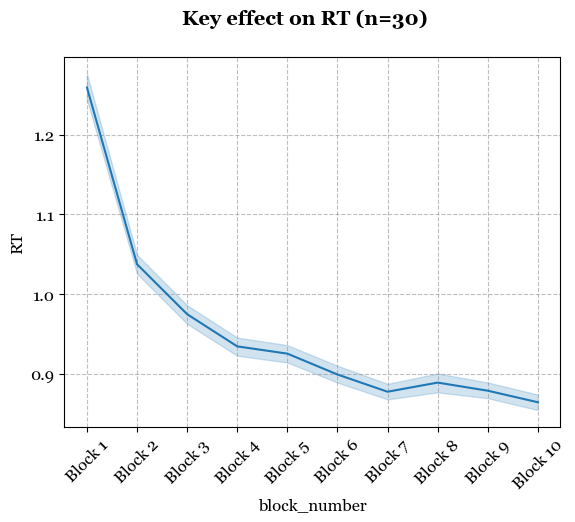

"\nQuestions/Remarks:\nThe discrepancy in between the first block and the rest is further explored on the next cell. \nWorse participants performs considerably worser in the 1st block\n\n1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. \nOnly focusing on blocks and it's corresponding acc and RT.\n\n2. Is SOA levels important in this plot? I was not sure so left it as a comment.\n\n"

In [7]:
# for each measure of performance separately
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df
    elif dv == 'acc':
        data = df
    plt.figure()
    plot = sns.lineplot(
        data = df,
        y = dv,
        x = 'block_number',
        #order = ['q','w','e','r','u','i','o','p'],
        #hue = 'soa',
        # hue = 'pt_num',
        palette = 'tab10',
        # join = True
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Key effect on accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Key effect on RT (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

"""
Questions/Remarks:
The discrepancy in between the first block and the rest is further explored on the next cell. 
Worse participants performs considerably worser in the 1st block

1. Was this what we wanted? This plot is based on regardless of occlusion type and difficulty level. 
Only focusing on blocks and it's corresponding acc and RT.

2. Is SOA levels important in this plot? I was not sure so left it as a comment.

"""

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30')])

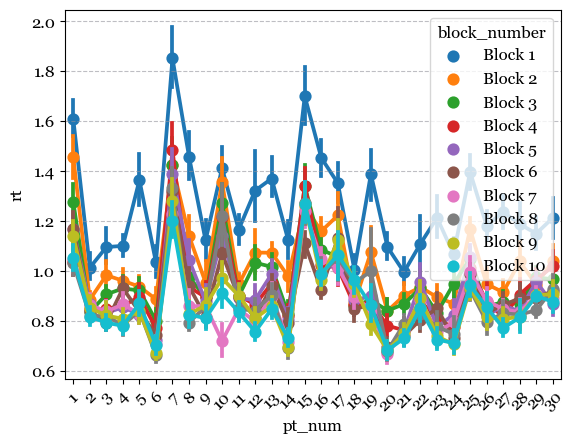

In [8]:
#Checking reaction time per block depending
sns.pointplot(x = df['pt_num'] , y = df['rt'], data = df, hue = 'block_number', palette = 'tab10')
plt.xticks(rotation = 45)

### difference between the control conditions in few large and many small

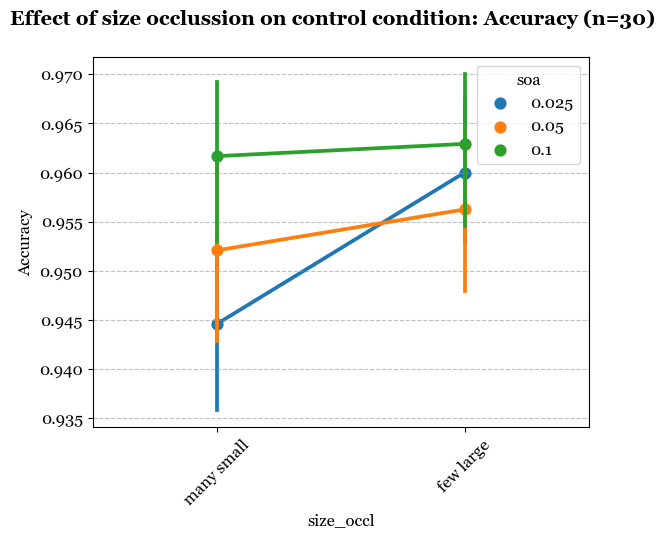

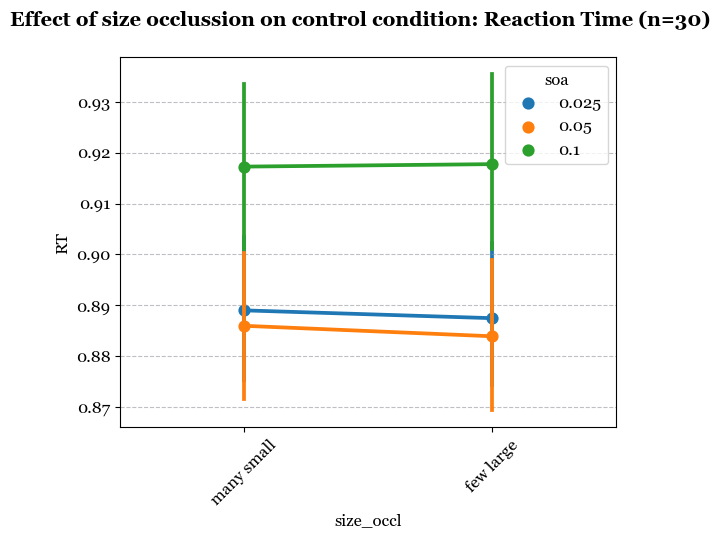

"\nRemarks:\nMore or less it seems to be stable, with few large condition being easier than many small\nReaction time is stable. Comment hue, if we don't want to see depending on SOA.\n\n\n\n"

In [9]:
# for each measure of performance separately
df1 = df[ df["difficulty"] == "control"]
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df1
    elif dv == 'acc':
        data = df1
    plt.figure()
    plot = sns.pointplot(
        data = df1,
        y = dv,
        x = 'size_occl',
        #order = ['q','w','e','r','u','i','o','p'],
        hue = 'soa',
        palette = 'tab10',
        join = True
    )
    if dv == 'acc':
        # plt.ylim(0.6, 1)
        plt.ylabel("Accuracy")
        plt.suptitle("Effect of size occlussion on control condition: Accuracy (n={})".format(n))
    elif dv == 'rt':
        # plt.ylim(900, 1200)
        plt.ylabel("RT")
        plt.suptitle("Effect of size occlussion on control condition: Reaction Time (n={})".format(n))
    #plt.title('For {} apertures'.format(so))
    #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation= 45)
    plt.show()

"""
Remarks:
More or less it seems to be stable, with few large condition being easier than many small
Reaction time is stable. Comment hue, if we don't want to see depending on SOA.



"""

### Checking Confusion Matrix on responses

'\nOK so what happened now? It seems a bit wrong, true duos dominating the matrix?\n'

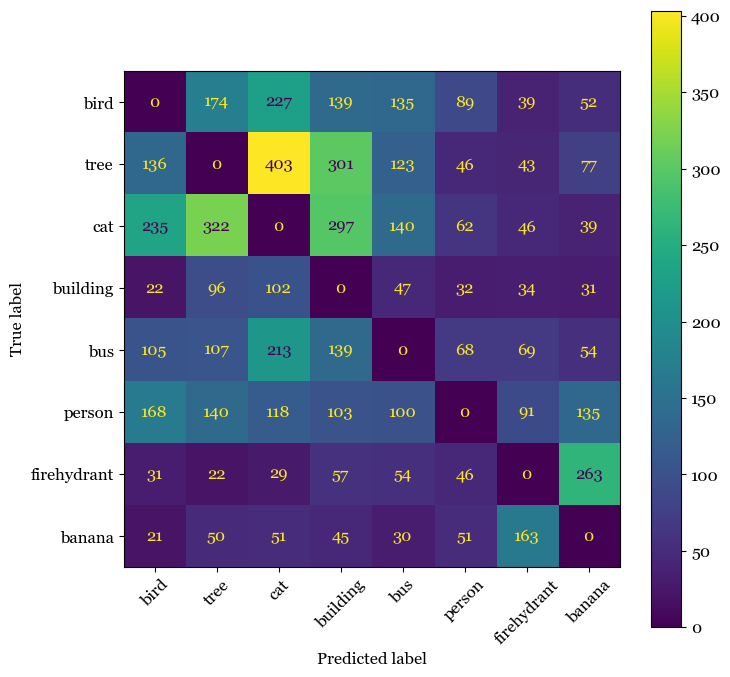

In [10]:
pred = df["choiced_category"]
true = df["category"]
cm = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
diag_idx = np.diag_indices(cm.shape[0]) # find the coordinates of the diagonal
zeroed_cm = cm # duplicate the diagonal
zeroed_cm[diag_idx] = 0 # zero out the values on it
with matplotlib.rc_context({'axes.grid': False}):
    fig, ax = plt.subplots(figsize = (8,8))
    cm_display = ConfusionMatrixDisplay(zeroed_cm,display_labels=['bird','tree','cat','building','bus','person','firehydrant','banana']).plot(xticks_rotation=45, ax = ax)
"""
OK so what happened now? It seems a bit wrong, true duos dominating the matrix?
"""


## Confusion Matrices in Detail

### Confusion Matrix for SOA = 0.025

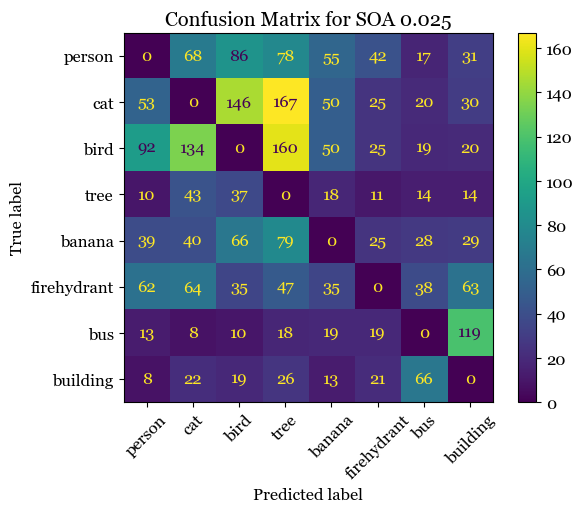

In [11]:
df_soa25 = df[ df["soa"] == 0.025]
pred = df_soa25["choiced_category"]
true = df_soa25["category"]
cm_25 = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_25.shape[0])
zeroed_cm_25 = cm_25
zeroed_cm_25[diag_idx] = 0
#zero out the diagonal -end
with matplotlib.rc_context({'axes.grid': False}):
    cm_display25 = ConfusionMatrixDisplay(cm_25,display_labels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']).plot()
    plt.xticks(rotation = 45)
    plt.title("Confusion Matrix for SOA 0.025")

### Confusion Matrix for SOA = 0.50

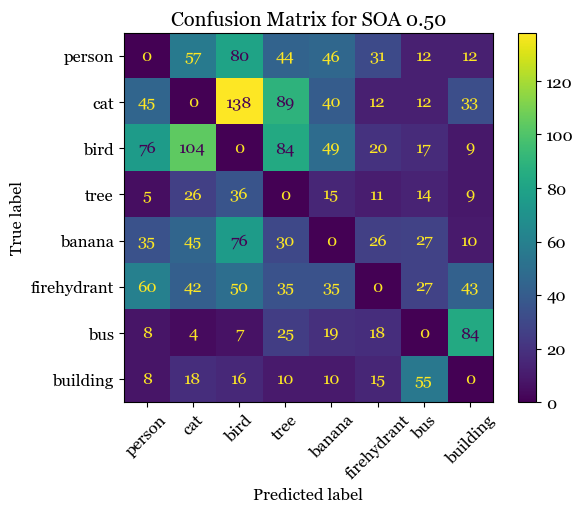

In [12]:
df_soa50 = df[ df["soa"] == 0.05]
pred = df_soa50["choiced_category"]
true = df_soa50["category"]
cm_50 = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_50.shape[0])
zeroed_cm_50 = cm_50
zeroed_cm_50[diag_idx] = 0
#zero out the diagonal -end
with matplotlib.rc_context({'axes.grid': False}):
    cm_display50 = ConfusionMatrixDisplay(cm_50,display_labels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']).plot()
    plt.xticks(rotation = 45)
    plt.title("Confusion Matrix for SOA 0.50")

### Confusion Matrix for SOA = 0.1

14400


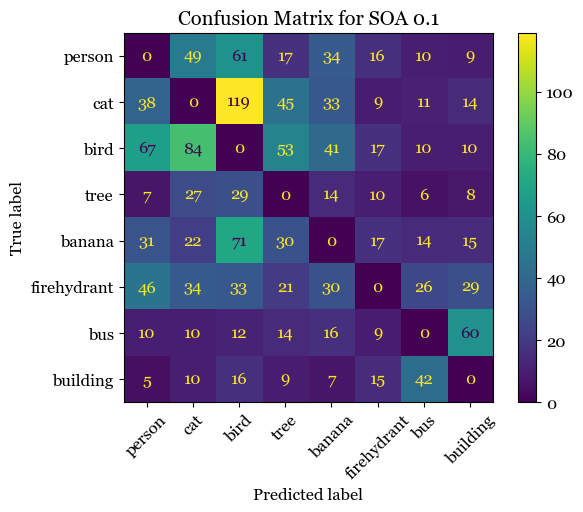

In [13]:
df_soa100 = df[ df["soa"] == 0.1]
print(len(df_soa100))
pred = df_soa100["choiced_category"]
true = df_soa100["category"]
cm_100 = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_100.shape[0])
zeroed_cm_100 = cm_100
zeroed_cm_100[diag_idx] = 0
#zero out the diagonal -end
with matplotlib.rc_context({'axes.grid': False}):
    cm_display100 = ConfusionMatrixDisplay(cm_100,display_labels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']).plot()
    plt.xticks(rotation = 45)
    plt.title("Confusion Matrix for SOA 0.1")

### Alternative Visualization for Confusion Matrices

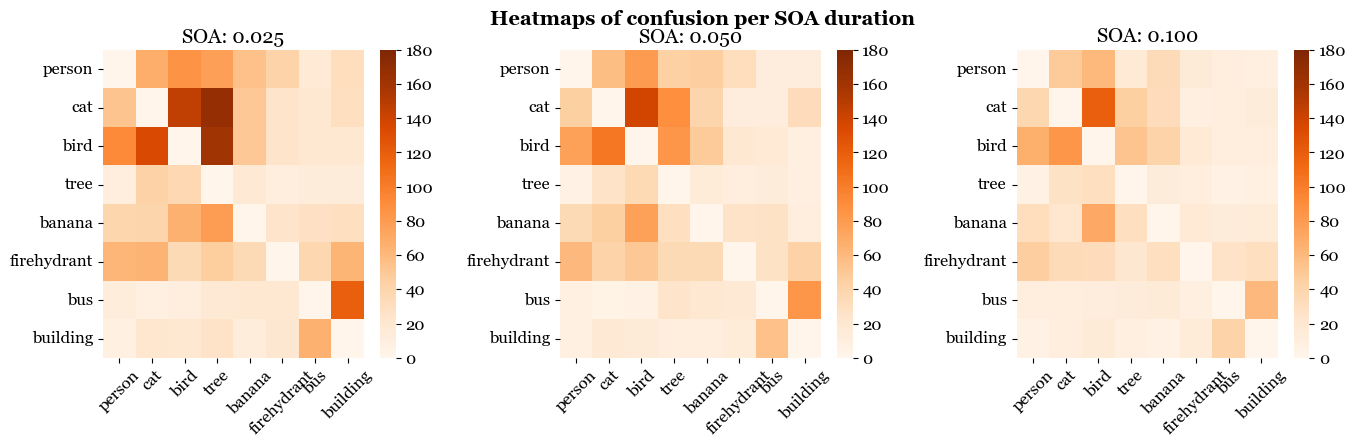

In [14]:
fig, axes = plt.subplots(1, 3, figsize = (16,4))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle("Heatmaps of confusion per SOA duration")
axes[0].set_title("SOA: 0.025")

soa_25 = sns.heatmap(cm_25, vmin=0, vmax=180,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax=axes[0])
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("SOA: 0.050")
soa_50 = sns.heatmap(cm_50,vmin=0, vmax=180,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax = axes[1])
axes[1].tick_params(axis='x', labelrotation = 45)

axes[2].set_title("SOA: 0.100")
soa_100 = sns.heatmap(cm_100,vmin=0, vmax=180,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap = "Oranges",
                 ax = axes[2])
axes[2].tick_params(axis='x', labelrotation = 45)

### Confusion Matrix with Control Difficulty

14400


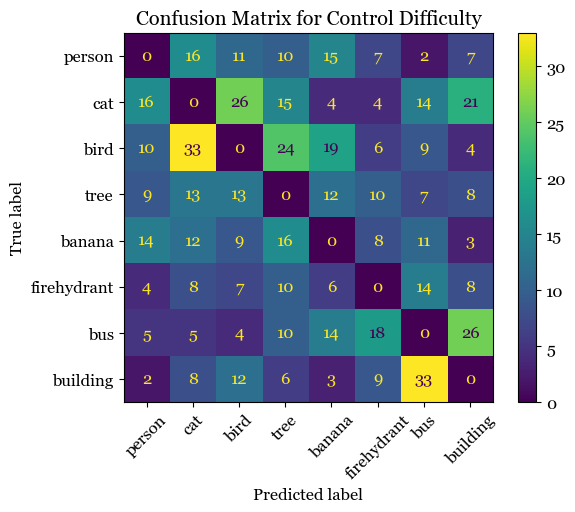

In [15]:
df_dif_control = df[ df["difficulty"] == "control"]
print(len(df_dif_control))
pred = df_dif_control["choiced_category"]
true = df_dif_control["category"]
cm_dif_control = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_dif_control.shape[0])
zeroed_cm_dif_control = cm_dif_control
zeroed_cm_dif_control[diag_idx] = 0
#zero out the diagonal -end
with matplotlib.rc_context({'axes.grid': False}):
    cm_display_control = ConfusionMatrixDisplay(cm_dif_control,display_labels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']).plot()
    plt.xticks(rotation = 45)
    plt.title("Confusion Matrix for Control Difficulty")

### Confusion Matrix with Low Difficulty

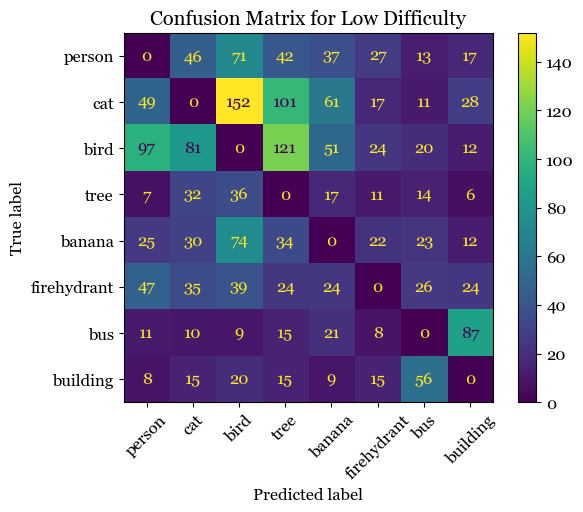

In [16]:
df_dif_low = df[ df["difficulty"] == "low"]
pred = df_dif_low["choiced_category"]
true = df_dif_low["category"]
cm_dif_low = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_dif_low.shape[0])
zeroed_cm_dif_low = cm_dif_low
zeroed_cm_dif_low[diag_idx] = 0
#zero out the diagonal -end
with matplotlib.rc_context({'axes.grid': False}):
    cm_display_dif_low = ConfusionMatrixDisplay(cm_dif_low,display_labels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']).plot()
    plt.xticks(rotation = 45)
    plt.title("Confusion Matrix for Low Difficulty")

### Confusion Matrix with High Difficulty

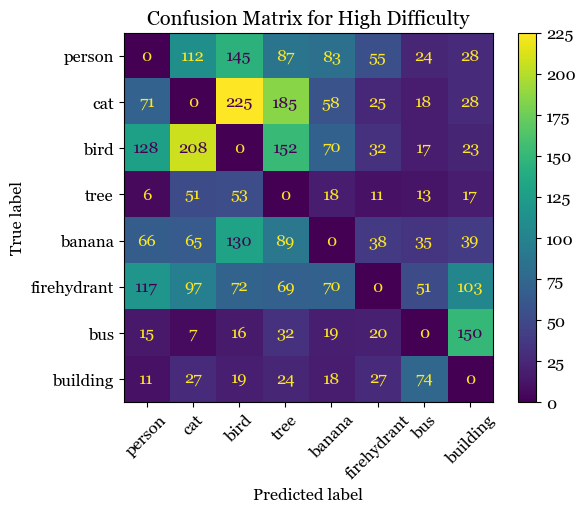

In [17]:
df_dif_high = df[ df["difficulty"] == "high"]
pred = df_dif_high["choiced_category"]
true = df_dif_high["category"]
cm_dif_high = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_dif_high.shape[0])
zeroed_cm_dif_high = cm_dif_high
zeroed_cm_dif_high[diag_idx] = 0
#zero out the diagonal -end
with matplotlib.rc_context({'axes.grid': False}):
    cm_display_dif_high = ConfusionMatrixDisplay(cm_dif_high,display_labels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']).plot()
    plt.xticks(rotation = 45)
    plt.title("Confusion Matrix for High Difficulty")

### Alternative Visualization for Difficulty Levels

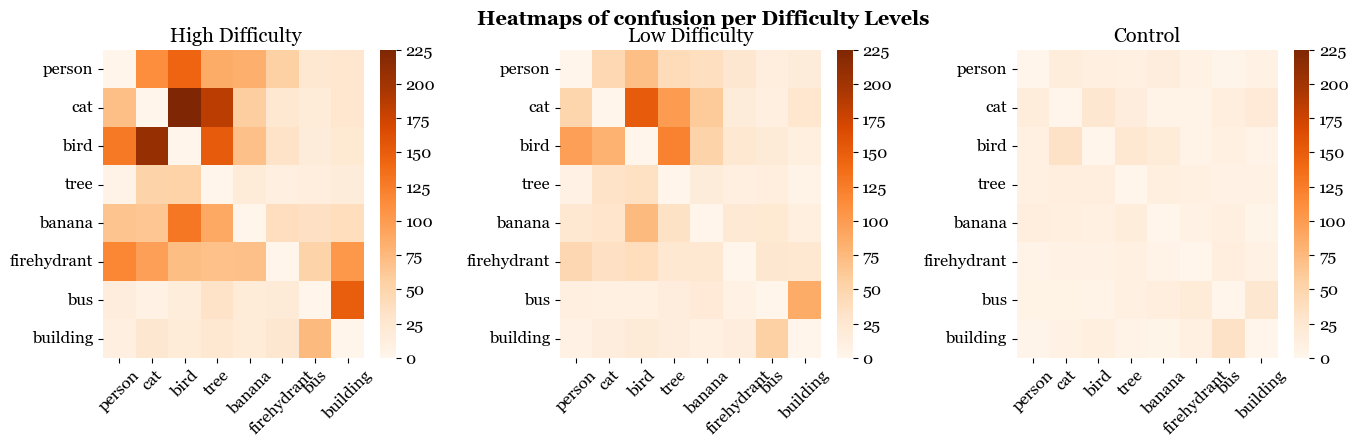

In [18]:
fig, axes = plt.subplots(1, 3, figsize = (16,4))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle("Heatmaps of confusion per Difficulty Levels")
axes[0].set_title(" High Difficulty")

dif_high = sns.heatmap(cm_dif_high, vmin=0, vmax=225,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax=axes[0])
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("Low Difficulty")
diff_low = sns.heatmap(cm_dif_low,vmin=0, vmax=225,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax = axes[1])
axes[1].tick_params(axis='x', labelrotation = 45)

axes[2].set_title("Control")
diff_control = sns.heatmap(cm_dif_control,vmin=0, vmax=225,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap = "Oranges",
                 ax = axes[2])
axes[2].tick_params(axis='x', labelrotation = 45)

### Confusion Matrix with fewlarge

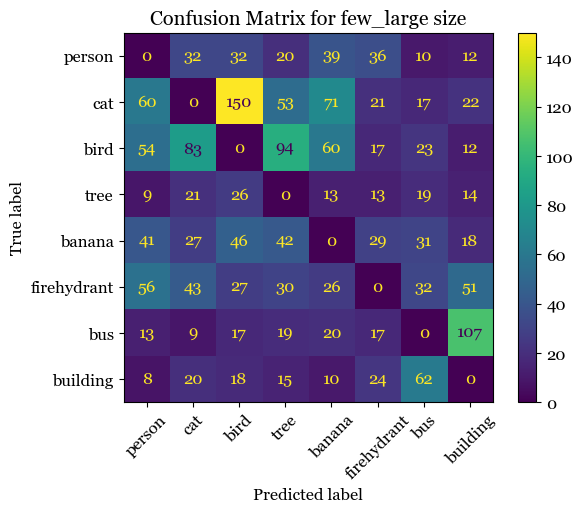

In [19]:
df_few_large = df[ df["size_occl"] == "few large"]
pred = df_few_large["choiced_category"]
true = df_few_large["category"]
cm_few_large = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_few_large.shape[0])
zeroed_cm_few_large = cm_few_large
zeroed_cm_few_large[diag_idx] = 0
#zero out the diagonal -end
with matplotlib.rc_context({'axes.grid': False}):
    cm_display_few_large = ConfusionMatrixDisplay(cm_few_large,display_labels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']).plot()
    plt.xticks(rotation = 45)
    plt.title("Confusion Matrix for few_large size")

### Confusion Matrix with manysmall

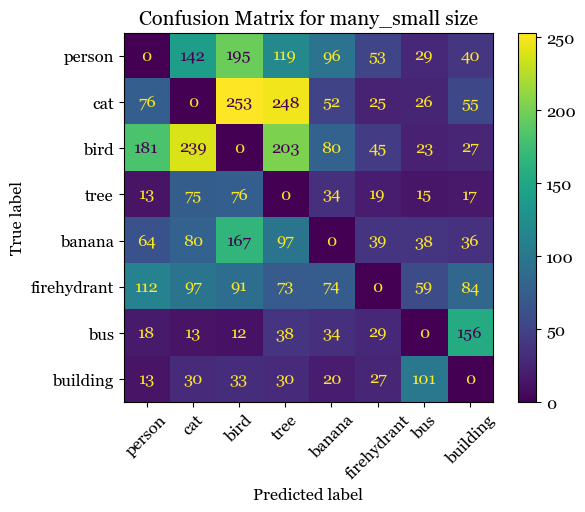

In [20]:
df_many_small = df[ df["size_occl"] == "many small"]
pred = df_many_small["choiced_category"]
true = df_many_small["category"]
cm_many_small = confusion_matrix(true, pred, labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'])
#Zero out the diagonal -start
diag_idx = np.diag_indices(cm_many_small.shape[0])
zeroed_cm_many_small = cm_many_small
zeroed_cm_many_small[diag_idx] = 0
#zero out the diagonal -end
with matplotlib.rc_context({'axes.grid': False}):
    cm_display_many_small = ConfusionMatrixDisplay(cm_many_small,display_labels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']).plot()
    plt.xticks(rotation = 45)
    plt.title("Confusion Matrix for many_small size")

### Alternative Visualization for Occluder Size

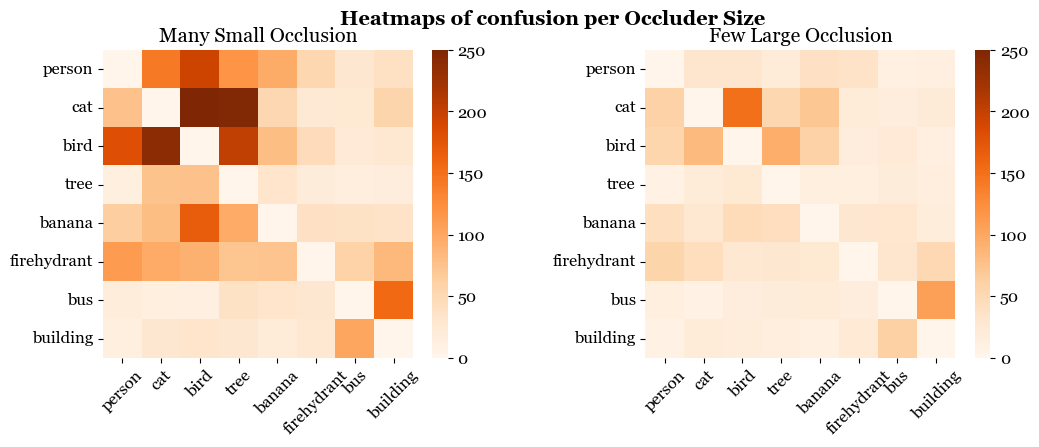

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (12,4))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle("Heatmaps of confusion per Occluder Size")
axes[0].set_title("Many Small Occlusion")

occ_many_small = sns.heatmap(cm_many_small, vmin=0, vmax=250,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax=axes[0])
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("Few Large Occlusion")
occ_few_large = sns.heatmap(cm_few_large,vmin=0, vmax=250,
                 xticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 yticklabels=['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],
                 cmap ="Oranges",
                 ax = axes[1])
axes[1].tick_params(axis='x', labelrotation = 45)


### Shape Distance Matrix and Correlations

In [22]:
SDM = pd.read_csv("shape_distance_matrix.csv", index_col = 0)
SDM_cm = SDM.to_numpy()

### 1st Option Visualize and compare the matrices

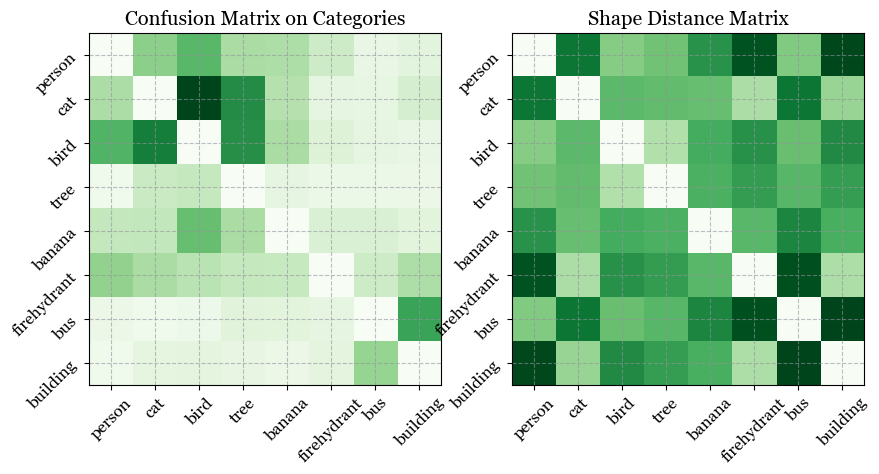

In [23]:
import matplotlib.pyplot as plt

# Assuming you have two confusion matrices: matrix1 and matrix2

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the first confusion matrix
axes[0].imshow(cm, cmap='Greens')
axes[0].set_title('Confusion Matrix on Categories')
# Plot the second confusion matrix
axes[1].imshow(SDM_cm, cmap='Greens')
axes[1].set_title('Shape Distance Matrix')

# Adjust the layout
#plt.tight_layout()
plt.yticks(ticks = [0,1,2,3,4,5,6,7], labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],rotation =45)
plt.xticks(ticks = [0,1,2,3,4,5,6,7], labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'], rotation =45)
plt.sca(axes[0])
plt.yticks(ticks = [0,1,2,3,4,5,6,7], labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],rotation =45)
plt.xticks(ticks = [0,1,2,3,4,5,6,7], labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building'],rotation =45)
# Display the plot
plt.show()



**So from what it seems there is not much of a resemblance in between the main Confmat and SDM, down below you can also find the version of correlation coefficient approach, I can do both of these options on the other (sub)confmats as well, but I want to double check with you whether this was actually the right approach or not**

### 2nd Option is to flatten and use a correlation coefficient

In [24]:
flat_matrix1 = cm.flatten()
flat_matrix2 = SDM_cm.flatten()

pearsonr(
    np.ravel(cm[~(np.identity(cm.shape[0], dtype=bool))]),
    np.ravel(SDM_cm[~(np.identity(SDM_cm.shape[0], dtype=bool))])
)
# Calculate the correlation coefficient
# correlation = np.corrcoef(flat_matrix1, flat_matrix2)[0, 1]

#print("Correlation Coefficient:", correlation)
#simply it is not confused by the shape.

PearsonRResult(statistic=-0.10681177152686974, pvalue=0.4333197355139484)

### Dimensionality Reduction (Work in Progress)

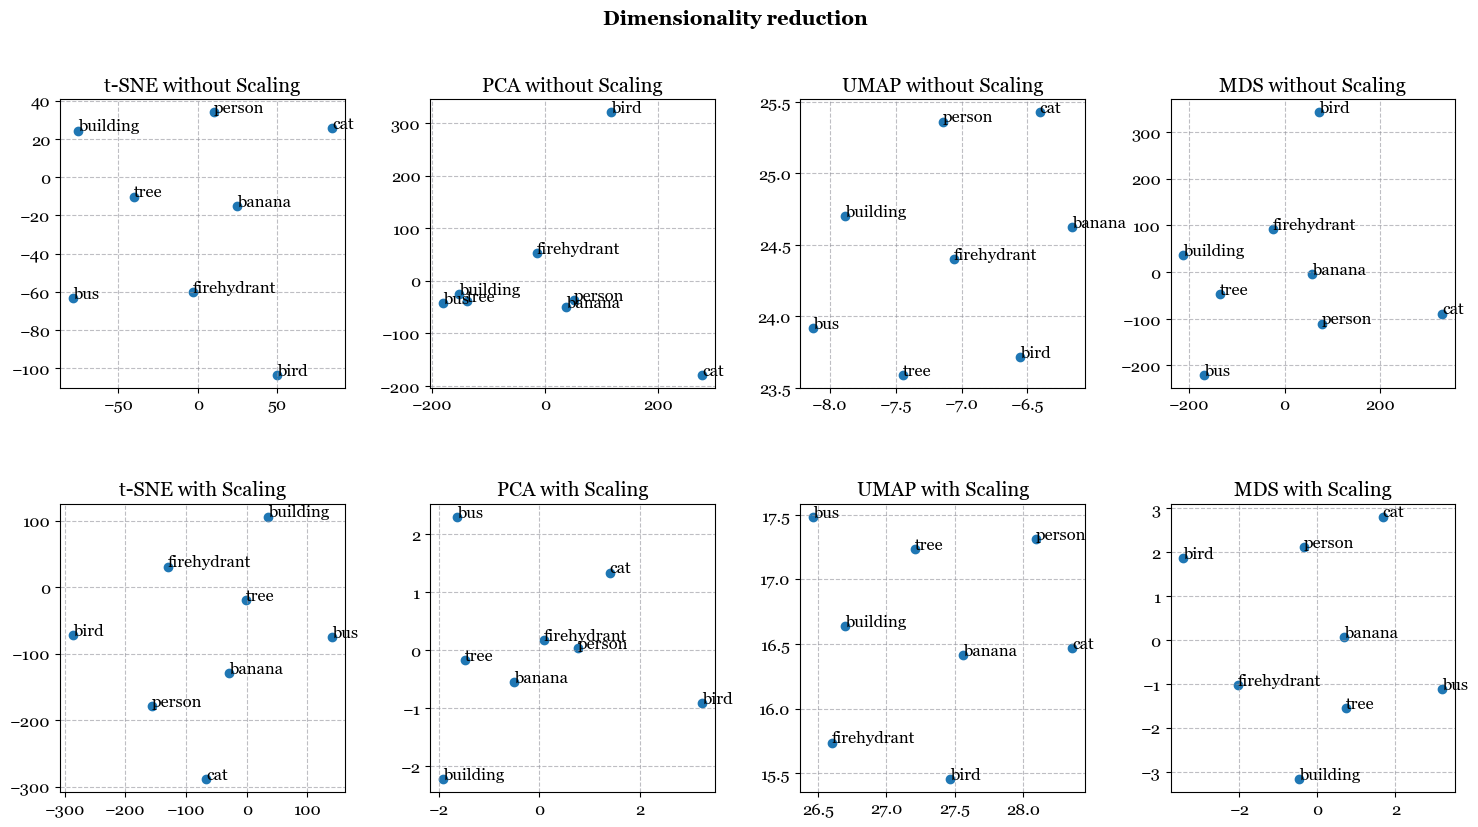

In [25]:
## MDS
# this script takes in confusion matrices and plots their data
# through different techniques
# it then compares human and NN data

#to ignore the package related warnings
import warnings
warnings.filterwarnings("ignore")

# import packages
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
import umap.umap_ as umap
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Make a dictionary holding all confusion matrices
labels = ['person', 'cat', 'bird', 'tree', 'banana', 'firehydrant', 'bus', 'building']

# Scale the data using StandardScaler
# this is using a simple z = (x - u) / s formula
scaler = StandardScaler()

# Apply dimensionality reduction techniques
dim_reduction_methods = {
    't-SNE': TSNE(n_components=2, random_state=42, perplexity=5),
    'PCA': PCA(n_components=2),
    'UMAP': umap.UMAP(n_components=2, random_state=42),
    'MDS': MDS(n_components=2, random_state=42),
}

# Plot the results
    
fig, axes = plt.subplots(2, len(dim_reduction_methods), figsize=(18, 9))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# For each model & each method make a visualisation and add it onto the figure
for i, (name, method) in enumerate(dim_reduction_methods.items()):
    # Apply dimensionality reduction without scaling
    reduced_matrix = method.fit_transform(cm)
    ax = axes[0, i]
    ax.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1])
    for j, txt in enumerate(labels):
        ax.annotate(txt, (reduced_matrix[j, 0], reduced_matrix[j, 1]))
    ax.set_title(f'{name} without Scaling')

    # Apply dimensionality reduction with scaling
    reduced_matrix = method.fit_transform(scaler.fit_transform(cm))
    ax = axes[1, i]
    ax.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1])
    for j, txt in enumerate(labels):
        ax.annotate(txt, (reduced_matrix[j, 0], reduced_matrix[j, 1]))
    ax.set_title(f'{name} with Scaling')

plt.suptitle(f'Dimensionality reduction', fontweight = 'bold')
plt.show()

**Well ok this worked on the main confmat but I am a bit puzzled regarding what we learn from this and whether we should apply this other confmats as well, I guess we can discuss this during our meetings**

## Sensibility

Here we define functions to calculate the sensitivity index (or discrimination index) d' of our data. This index is the difference between the z-scores of the hit rate and false alarm rate of a given set of data. We take it category by category.

In [29]:
def find_hit(data, category):
  """
  Calculates the hit rate for a given category of the eight possible.

  Args:
    data: The DataFrame containing the data.
    category: The given category.

  Returns:
    hit_rate (float): the corresponding hit rate.
  """
  
  hits = np.sum(data.loc[data['category']==category, 'acc'])
  trials = len(data.loc[data['category']==category])

  hit_rate = hits / trials

  return hit_rate

def find_fa(data, category):
  """
  Calculates the false alarm for a given category of the eight possible. Note that this
  rate is corrected for the number of categories.

  Args:
    data: The DataFrame containing the data.
    category: The given category.

  Returns:
    false_alarm_rate (float): the corresponding false alarm rate.
  """
  
  false_alarms = len(data.loc[(data['choiced_category']==category) & (data['category']!=category)])
  n_trials = len(data.loc[(data['category']!=category)])

  false_alarm_rate = false_alarms / n_trials

  return false_alarm_rate

def d_prime(data, category):
  """
  Calculates the discrimination index (d') of a given category given the hit rate,
  false alarm rate, and number of categories.

  Args:
    data (df): dataframe with variables 'category' and 'prediction'
    category (str): name of a category

  Returns:
    d (float): the discrimination index (d') of the input category.
  """
  
  hit_rate = find_hit(data, category)
  false_alarm_rate = find_fa(data, category)

  z_hit = stats.norm.ppf(hit_rate)
  z_fa = stats.norm.ppf(false_alarm_rate)
  
  return z_hit - z_fa

In [30]:
# make a table with the categories and their associated d primes
dprime = pd.DataFrame({
    'category': [category for category in labels],
    'd prime': [d_prime(df, category) for category in labels]
})
# print the results
print(dprime)

      category   d prime
0       person  3.076300
1          cat  2.785230
2         bird  2.679237
3         tree  3.397194
4       banana  3.209836
5  firehydrant  3.312083
6          bus  3.554026
7     building  3.545264


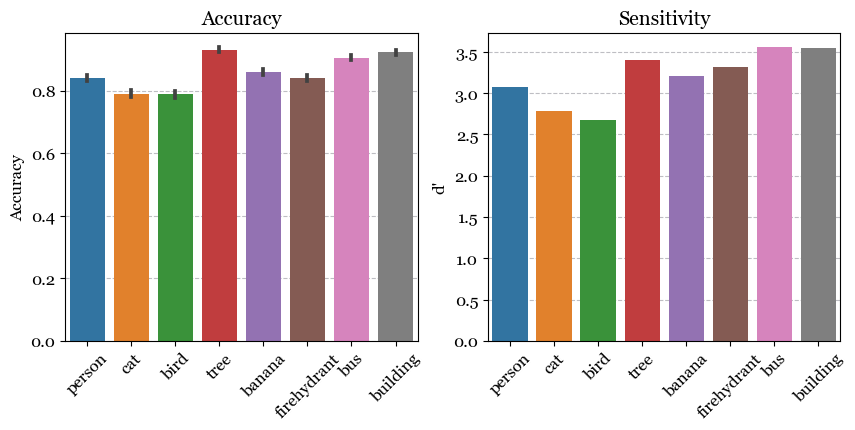

In [31]:
f = plt.figure(figsize = (10,4))
# accuracy plot
f.add_subplot(121)
acc_plot = sns.barplot(data = df, y = 'acc', x = 'category', order = labels, zorder = 2)
plt.xticks(rotation = 45)
acc_plot.set(xlabel = None, ylabel = 'Accuracy', title = 'Accuracy')
# sensitivity plot
f.add_subplot(122)
sen_plot = sns.barplot(data = dprime, y = 'd prime', x = 'category', order = labels, zorder = 2)
sen_plot.set(xlabel = None, ylabel = 'd\'', title = 'Sensitivity')
plt.xticks(rotation = 45)
plt.show()